In [2]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()

In [3]:
df = pd.read_csv('barkley_marathon_pageviews.csv')
df.head()

,Date,Barkley Marathons
0,2015-07-01,101
1,2015-07-02,122
2,2015-07-03,95
3,2015-07-04,107
4,2015-07-05,92


In [4]:
df.tail()

,Date,Barkley Marathons
1418,2019-05-19,1341
1419,2019-05-20,1153
1420,2019-05-21,951
1421,2019-05-22,944
1422,2019-05-23,1001


In [5]:
df.dtypes

Date                 object
Barkley Marathons     int64
dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [12]:
df

,Barkley Marathons
2015-07-01,101.0
2015-07-02,122.0
2015-07-03,95.0
2015-07-04,107.0
2015-07-05,92.0
2015-07-06,158.0
2015-07-07,108.0
2015-07-08,112.0
2015-07-09,116.0
2015-07-10,144.0


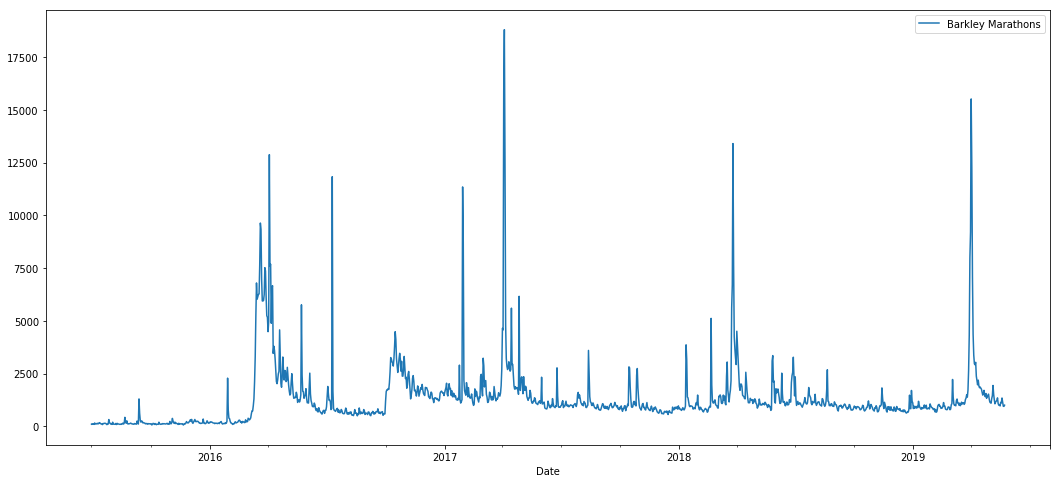

In [7]:
df.plot(figsize=(18,8));

In [8]:
df = df.reindex(pd.date_range(start='2015-07-01', end='2020-05-23'))

In [11]:
df

,Barkley Marathons
2015-07-01,101.0
2015-07-02,122.0
2015-07-03,95.0
2015-07-04,107.0
2015-07-05,92.0
2015-07-06,158.0
2015-07-07,108.0
2015-07-08,112.0
2015-07-09,116.0
2015-07-10,144.0


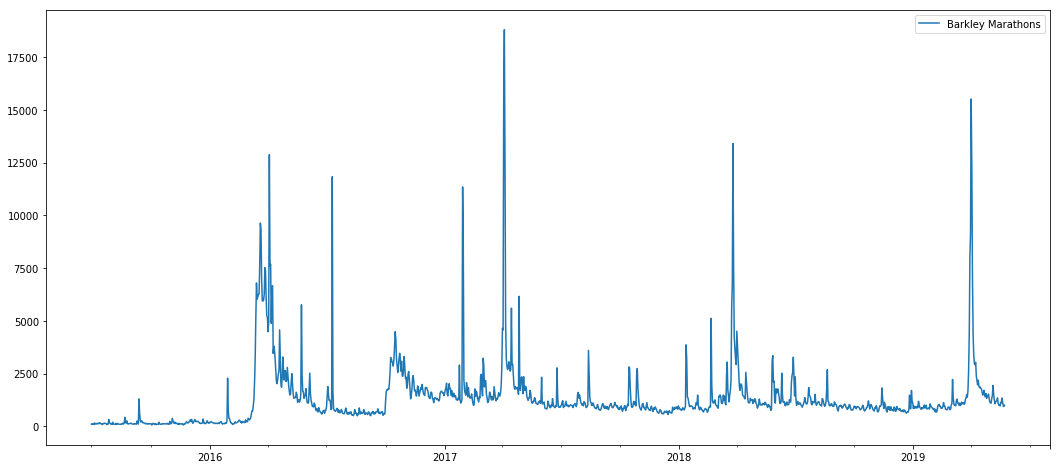

In [9]:
df.plot(figsize=(18,8));

In [73]:
df['Barkley Marathons'].mean()

1317.279690794097

TypeError: float() argument must be a string or a number, not 'Period'

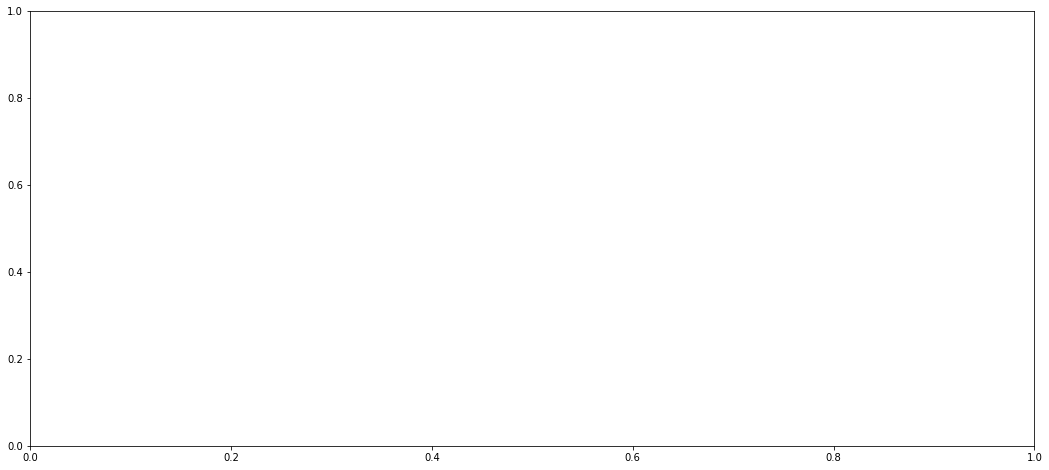

In [74]:
df['Mean Baseline'] = df['Barkley Marathons'].mean()
df.plot(figsize=(18,8));

In [75]:
df = df.reset_index().rename(columns={'index': 'ds', 'Barkley Marathons': 'y'})
df.head()

,ds,y,Mean Baseline
0,2015-07-01,101.0,1317.279691
1,2015-07-02,122.0,1317.279691
2,2015-07-03,95.0,1317.279691
3,2015-07-04,107.0,1317.279691
4,2015-07-05,92.0,1317.279691


In [77]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [78]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2149,2021-05-19
2150,2021-05-20
2151,2021-05-21
2152,2021-05-22
2153,2021-05-23


In [79]:
forecast = m.predict(future)

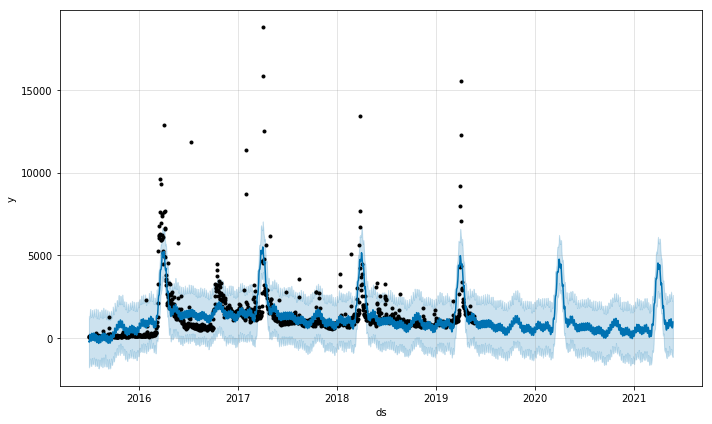

In [89]:
fig1 = m.plot(forecast)